In [2]:
!pip install -Uqq fastbook

In [3]:
import fastbook
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
path = untar_data(URLs.MNIST)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [7]:
(path/'training').ls()

(#10) [Path('training/6'),Path('training/9'),Path('training/1'),Path('training/3'),Path('training/4'),Path('training/2'),Path('training/8'),Path('training/7'),Path('training/5'),Path('training/0')]

In [8]:
digits = [img.ls().sorted() for img in sorted((path/'training').iterdir())]
digits[0]

(#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...]

In [9]:
valid_digits = [img.ls().sorted() for img in sorted((path/'testing').iterdir())]
valid_digits[0]

(#980) [Path('testing/0/10.png'),Path('testing/0/1001.png'),Path('testing/0/1009.png'),Path('testing/0/101.png'),Path('testing/0/1034.png'),Path('testing/0/1047.png'),Path('testing/0/1061.png'),Path('testing/0/1084.png'),Path('testing/0/1094.png'),Path('testing/0/1121.png')...]

In [10]:
im3_path = digits[3][0]
im3 = Image.open(im3_path)
im3

In [11]:
len(digits[0])

5923

In [12]:
all_digit_tensors = []
for digit in digits:
    curr_digit_tensors = []
    for img in digit:
        curr_digit_tensors.append(tensor(Image.open(img)))
    all_digit_tensors.append(curr_digit_tensors)

len(all_digit_tensors),len(all_digit_tensors[0])

(10, 5923)

In [13]:
# same for valid dataset
all_valid_tensors = []
for valid_digit in valid_digits:
    curr_digit_tensors = []
    for img in valid_digit:
        curr_digit_tensors.append(tensor(Image.open(img)))
    all_valid_tensors.append(curr_digit_tensors)
len(all_valid_tensors),len(all_valid_tensors[0])

(10, 980)

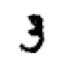

In [14]:
show_image(all_digit_tensors[3][0]);

In [15]:
# stack all digits to a single rank 3 tensor
stacked_digits = [torch.stack(digit_tensors) for digit_tensors in all_digit_tensors]

len(stacked_digits),stacked_digits[0].shape

(10, torch.Size([5923, 28, 28]))

In [16]:
# same for valid dataset
stacked_valid_digits = [torch.stack(valid_tensors) for valid_tensors in all_valid_tensors]
len(stacked_valid_digits),stacked_valid_digits[0].shape

(10, torch.Size([980, 28, 28]))

In [17]:
# concatanete 10 rank 3 tensors to a vector of rank 2 tensor
train_x = torch.cat(stacked_digits).view(-1, 28*28)
train_x.ndim,len(train_x)

(2, 60000)

In [18]:
concatenated = ([0] * len(digits[0]))
for i in range(1, 10):
    digit = digits[i]
    concatenated += (([i] * len(digit)))

train_y = tensor(concatenated).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [19]:
# make pairs of x,y
data_set = list(zip(train_x,train_y))
x,y = data_set[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [20]:
# same for valid dataset
valid_x = torch.cat(stacked_valid_digits).view(-1, 28*28)

concatenated = ([0] * len(stacked_valid_digits[0]))
for i in range(1, 10):
    digit = stacked_valid_digits[i]
    concatenated += (([i] * len(digit)))

valid_y = tensor(concatenated).unsqueeze(1)
valid_x.shape,valid_y.shape

(torch.Size([10000, 784]), torch.Size([10000, 1]))

In [21]:
valid_data_set = list(zip(valid_x,valid_y))
x,y = valid_data_set[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [22]:
# init random weight for every pixel
def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

In [23]:
weights = init_params((28*28, 10))

In [24]:
bias = init_params(1)

In [78]:
# calculate predictions
def linear1(xb):
    return xb.float()@weights.float() + bias.float()

In [26]:
preds = linear1(train_x)
preds

tensor([[-3403.9121,  -990.5995,  1072.9686,  ...,  -407.2856,  -248.5803,  3247.5859],
        [-2050.6216, -1035.9130,   257.5046,  ..., -2342.5229,   337.0330,  2356.1213],
        [-6161.1396,   666.9398,  2714.0068,  ...,  -534.0471,  6277.3252,  5476.2720],
        ...,
        [-4615.6353,  1121.9987,   880.8896,  ...,   344.3897,  2259.5054,  2940.5774],
        [-3957.1206,  -811.4125,   326.7284,  ...,   358.3096,  3976.8506,  2415.5889],
        [-3246.3418,  1270.5164,  1337.2656,  ...,  2496.3921,   908.1553,  2217.3281]], grad_fn=<AddBackward0>)

In [27]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True,  True, False,  ...,  True,  True, False],
        [ True,  True, False,  ...,  True, False, False],
        [ True, False, False,  ...,  True, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [28]:
corrects.float().mean().item()

0.1102033331990242

In [29]:
with torch.no_grad(): weights[0] *= 1.0001

In [30]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.1102033331990242

In [31]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [43]:
mnist_loss(tensor([0.9, 0.4, 0.8]),tensor([3,6,4]))

tensor(0.6665)

In [45]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

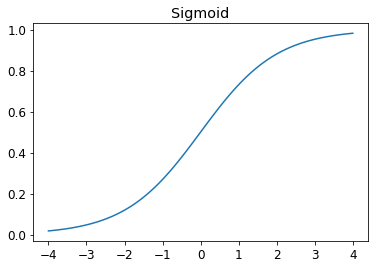

In [48]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [79]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 0,  7,  4,  5, 11]),
 tensor([ 9,  3,  8, 14,  6]),
 tensor([12,  2,  1, 10, 13])]

In [80]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [81]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 6, 14, 12, 15, 24, 11]), ('g', 'o', 'm', 'p', 'y', 'l')),
 (tensor([ 0, 16,  2, 18, 25, 21]), ('a', 'q', 'c', 's', 'z', 'v')),
 (tensor([ 8,  7, 19, 23,  1,  9]), ('i', 'h', 't', 'x', 'b', 'j')),
 (tensor([ 4, 13, 10,  5,  3, 17]), ('e', 'n', 'k', 'f', 'd', 'r')),
 (tensor([22, 20]), ('w', 'u'))]

In [82]:
weights = init_params((28*28,1))
bias = init_params(1)

In [83]:
dl = DataLoader(data_set, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [84]:
valid_dl = DataLoader(valid_data_set, batch_size=256)

In [85]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [86]:
preds = linear1(batch)
preds

tensor([[-2112.4441],
        [  984.1880],
        [  315.7421],
        [-5263.5396]], grad_fn=<AddBackward0>)

In [87]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.5000, grad_fn=<MeanBackward0>)

In [88]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(0.), tensor([0.]))

In [89]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(0.), tensor([0.]))

In [90]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(0.), tensor([0.]))

In [77]:
weights.grad.zero_()
bias.grad.zero_();

In [35]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [36]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [37]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [38]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [39]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [42]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

NameError: name 'dl' is not defined